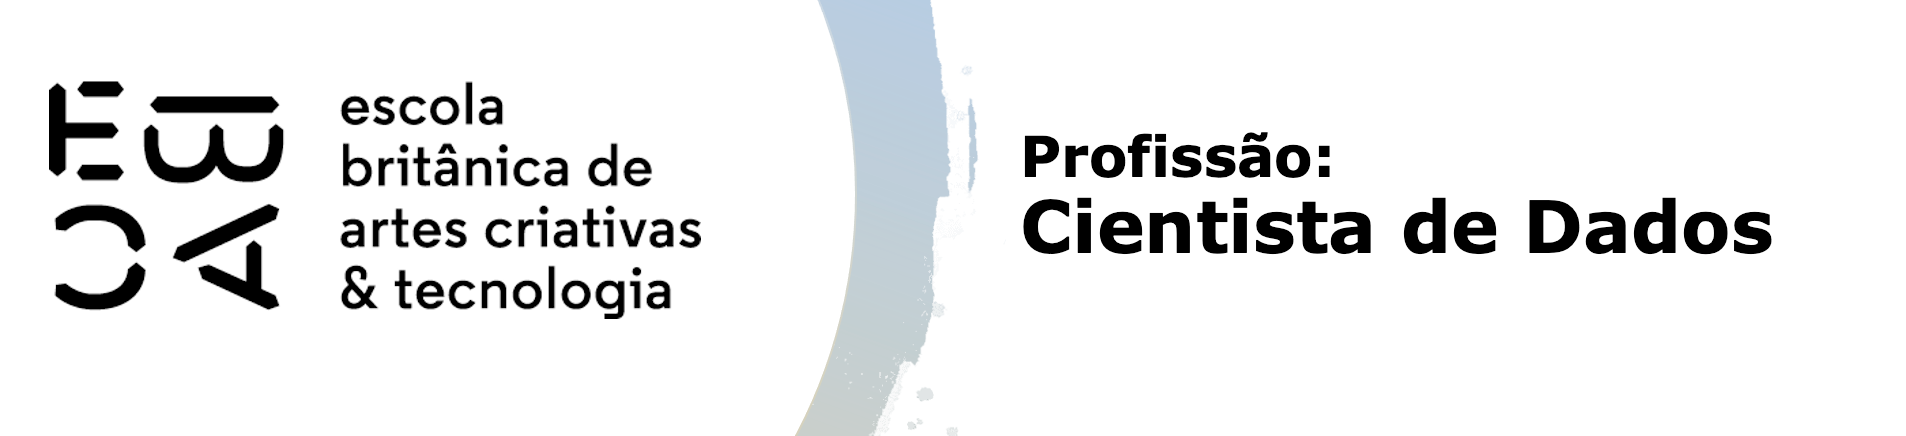

# Tarefa: Regressão IV

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base.

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado).

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [58]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor

import patsy
import statsmodels.api as sm

from scipy.interpolate import interp1d
import warnings;   warnings.filterwarnings("ignore")


In [59]:
# Carregando os dados
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [60]:
# Verificando se há dados nulos
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [61]:
# Substituindo os valores missing pela média

df['tempo_emprego'].fillna(value=df['tempo_emprego'].mean(), inplace=True)

In [62]:
# Verificando novamente se há dados nulos
df.isnull().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [63]:
# Separando bases de treino e teste baseado na data
df_train = df[:'2015-12-01']
df_test = df['2016-01-01':]

# Criando as variáveis log_renda
df_train['log_renda']=np.log(df_train['renda'])
df_test['log_renda']=np.log(df_test['renda'])

In [65]:
# No módulo passado já obtivemos um modelo com 4 variáveis explicativas através da regressão LASSO

X1 = patsy.dmatrices('''log_renda ~ C(posse_de_imovel)
                    + qtd_filhos
                    + idade
                    + tempo_emprego
                    + 1''', df_train)

res = smf.ols(X1, data=df_train).fit_regularized(method = 'elastic_net', refit = True, L1_wt = 1, alpha = 0.05)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 1.103e+05
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:52:26   Log-Likelihood:            -8.0490e+05
No. Observations:              600000   AIC:                         1.610e+06
Df Residuals:                  599996   BIC:                         1.610e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.3826      0.005   1693.373      0.000       8.373       8.392
C(posse_de_imovel)[T.S]     0.1790      0.003     69.703      0.000       0.174       0.184
qtd_filhos                       0          0        nan        nan           0           0
idade                      -0.0056      0.000    -50.285      0.000      -0.006      -0.005
tempo_emprego               0.1317      0.000    650.147      0.000       0.131       0.132
==============================================================================
Omnibus:                      891.428   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.178
Skew:                          -0.048   Prob(JB):                    2.13e-173
Kurtosis:                       2.850   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Como R² não se alterou a variável idade pode-se remover variáveis

X1 = patsy.dmatrices('''log_renda ~ C(posse_de_imovel)
                    + tempo_emprego
                    + 1''', df_train)

res = smf.ols(X1, data=df_train).fit_regularized(method = 'elastic_net', refit = True, L1_wt = 1, alpha = 0.05)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.456e+05
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:54:15   Log-Likelihood:            -8.0617e+05
No. Observations:              600000   AIC:                         1.612e+06
Df Residuals:                  599997   BIC:                         1.612e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   8.1700      0.003   3166.772      0.000       8.165       8.175
C(posse_de_imovel)[T.S]     0.1615      0.003     63.353      0.000       0.157       0.167
tempo_emprego               0.1291      0.000    657.553      0.000       0.129       0.129
==============================================================================
Omnibus:                      863.676   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              773.991
Skew:                          -0.048   Prob(JB):                    8.51e-169
Kurtosis:                       2.853   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1. Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

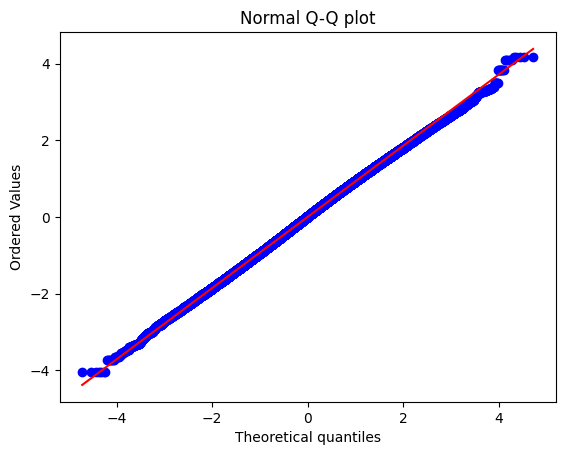

In [32]:
# NORMALIDADE DOS RESÍDUOS:
# gráfico Q-Q para verificar se os resíduos seguem uma distribuição normal
residuos = res.resid
ss.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


> Os resíduos do seu modelo seguem uma distribuição normal. Isso é evidente pelo fato de que os pontos no gráfico formam uma linha reta aproximada. Isso é um bom sinal, pois uma das suposições da regressão linear é que os resíduos sejam normalmente distribuídos. Portanto, com base neste gráfico, a suposição é atendida para o modelo.

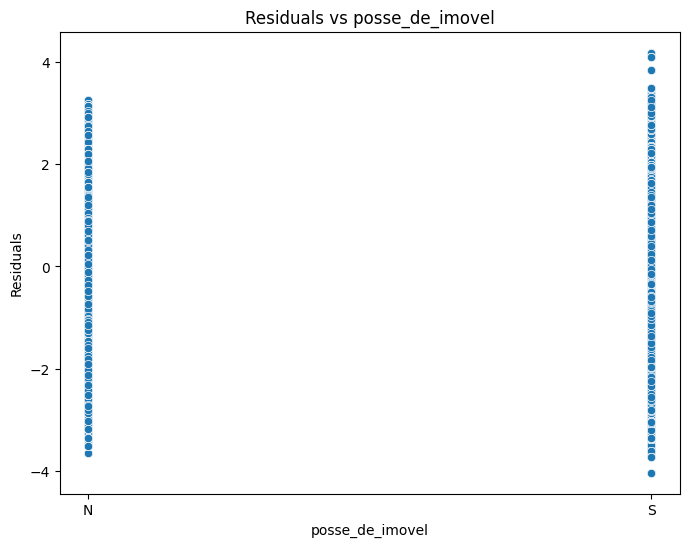

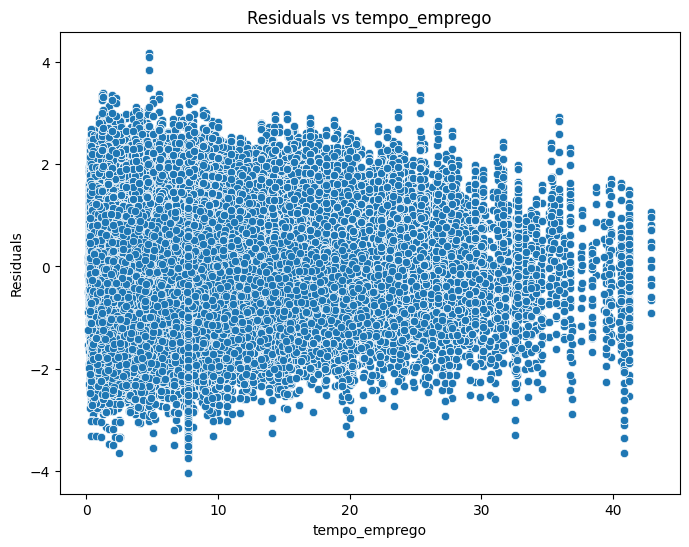

In [33]:
#  A INDEPENDÊNCIA DOS RESÍDUOS:
# Calculando os resíduos
df_train['residuos'] = res.resid

# Gráfico de dispersão para 'posse_de_imovel'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_train['posse_de_imovel'], y=df_train['residuos'])
plt.title('Residuals vs posse_de_imovel')
plt.xlabel('posse_de_imovel')
plt.ylabel('Residuals')
plt.show()

# Gráfico de dispersão para 'tempo_emprego'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_train['tempo_emprego'], y=df_train['residuos'])
plt.title('Residuals vs tempo_emprego')
plt.xlabel('tempo_emprego')
plt.ylabel('Residuals')
plt.show()


> O gráfico de dispersão dos resíduos versus a variável 'posse_de_imovel' mostra dois grupos distintos de pontos, um para cada categoria de 'posse_de_imovel' (N e S). Dentro de cada grupo, os resíduos parecem ser distribuídos aleatoriamente em torno de zero, o que é um bom sinal. <br>
No entanto, há uma diferença na média dos resíduos entre as duas categorias. Isso pode indicar que a variável 'posse_de_imovel' tem um efeito significativo na variável dependente. Como os resíduos não mostram um padrão claro de aumento ou diminuição com 'posse_de_imovel', isso sugere que os resíduos são independentes dessa variável, o que é bom para a suposição de independência dos resíduos.

> O gráfico de dispersão dos resíduos versus a variável 'tempo_emprego' mostra que os resíduos estão distribuídos aleatoriamente em torno de zero, sem um padrão claro de aumento ou diminuição com 'tempo_emprego'. Isso é um bom sinal, pois sugere que os resíduos são independentes dessa variável, o que é uma suposição importante para a regressão linear.

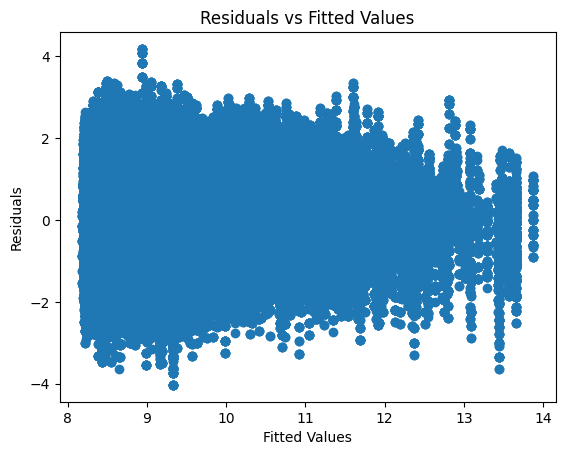

In [34]:
# HOMOCEDASTICIDADE:
plt.scatter(res.fittedvalues, residuos)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


> O gráfico de dispersão dos resíduos versus os valores ajustados mostram os resíduos distribuídos aleatoriamente em torno de zero, sem um padrão claro de aumento ou diminuição com os valores ajustados. Isso sugere que a suposição de homocedasticidade pode ser atendida para o modelo.<br>

In [35]:
# Codificando a variável 'posse_de_imovel' como numérica
df_train = pd.get_dummies(df_train, columns=['posse_de_imovel'], drop_first=True)

# Obtendo as variáveis independentes do modelo
X = df_train[['posse_de_imovel_S', 'tempo_emprego']]

# Adicionando uma constante para o intercepto
X = sm.add_constant(X)

# Calculando o VIF para cada variável
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


           variables       VIF
0              const  4.642860
1  posse_de_imovel_S  1.000017
2      tempo_emprego  1.000017


> Os resultados do Fator de Inflação da Variância (VIF) mostram que não há multicolinearidade entre as variáveis independentes no modelo. Isso é evidente pelo fato de que todos os valores de VIF são muito próximos de 1, que é o valor ideal. Isso indica que as variáveis independentes 'posse_de_imovel_S' e 'tempo_emprego' não estão altamente correlacionadas entre si, o que é bom para a validade do modelo.

## 2. Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

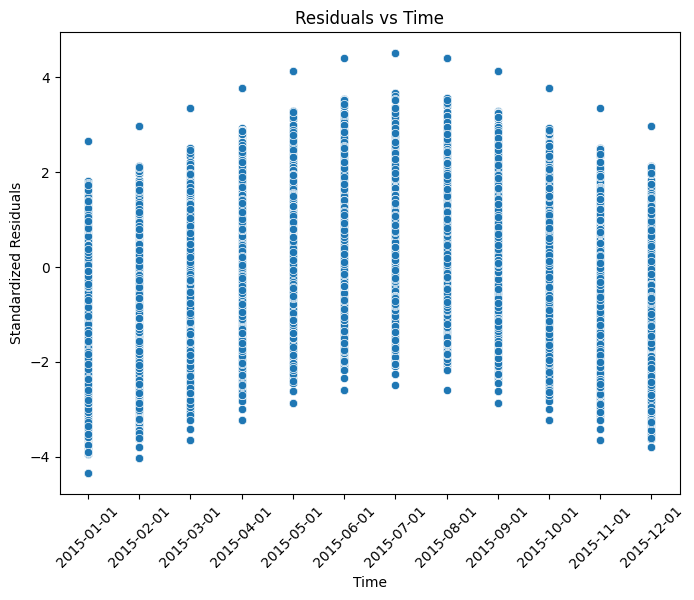

In [67]:
# Ajustando o modelo usando a função 'fit'
y, X = X1  # Desempacotando a tupla
model = sm.OLS(y, X)
results = model.fit()

# Calculando os resíduos padronizados
df_train['residuos_padronizados'] = results.get_influence().resid_studentized_internal

# Criando um gráfico dos resíduos padronizados
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_train.index, y=df_train['residuos_padronizados'])
plt.title('Residuals vs Time')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Standardized Residuals')
plt.show()


O gráfico de dispersão dos resíduos padronizados versus o tempo mostra que os resíduos estão distribuídos aleatoriamente em torno de zero, sem um padrão claro de aumento ou diminuição com o tempo.<br>
A maioria dos resíduos padronizados está dentro do intervalo de -3 a 3, o que é um bom sinal, pois os resíduos padronizados com um valor absoluto maior que 3 são geralmente considerados outliers. <br>
No entanto, existem alguns pontos que estão fora desse intervalo, indicando a presença de possíveis outliers.

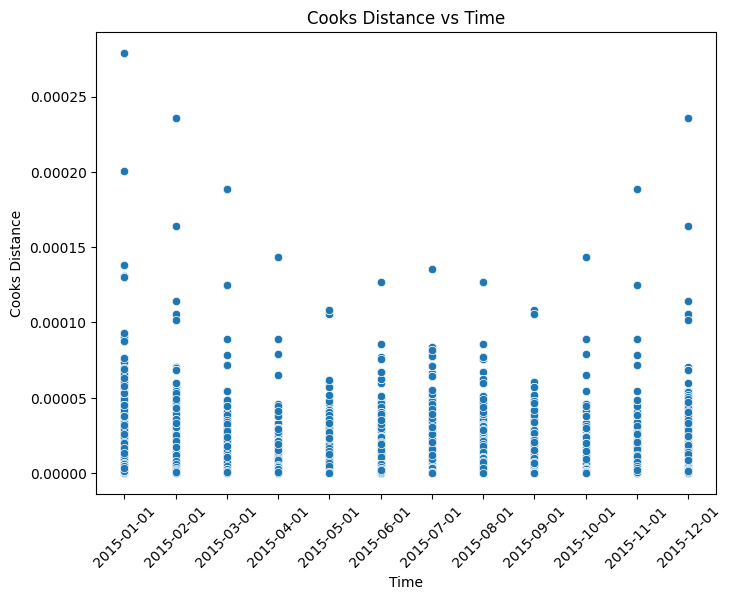

In [69]:
# Ajustando o modelo usando a função 'fit'
y, X = X1  # Desempacotando a tupla
model = sm.OLS(y, X)
results = model.fit()

# Calculando a distância de Cook
(df_train['cooks_distance'], _) = results.get_influence().cooks_distance

# Criando um gráfico da distância de Cook
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_train.index, y=df_train['cooks_distance'])
plt.title('Cooks Distance vs Time')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('Cooks Distance')
plt.show()


> O gráfico de dispersão da distância de Cook versus o tempo mostra que a maioria dos pontos tem uma distância de Cook muito próxima de zero, o que é um bom sinal. No gráfico, todas as distâncias de Cook parecem ser muito menores que 1, sugerindo que não há pontos influentes, o que ajuda a validar o modelo.

## 3. Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [75]:
# Calculando a matriz de correlação de Spearman
correlation_matrix = df_train[['posse_de_imovel_S', 'tempo_emprego']].corr(method='spearman')

# Imprimindo a matriz de correlação
print(correlation_matrix)


                   posse_de_imovel_S  tempo_emprego
posse_de_imovel_S           1.000000       0.014221
tempo_emprego               0.014221       1.000000


In [79]:
# Obtendo as variáveis independentes do modelo
X = df_train[['posse_de_imovel_S', 'tempo_emprego']]

# Adicionando uma constante para o intercepto
X = sm.add_constant(X)

# Calculando o VIF para cada variável
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)



           variables       VIF
0              const  4.642860
1  posse_de_imovel_S  1.000017
2      tempo_emprego  1.000017


> Os resultados mostram que não há multicolinearidade entre as variáveis independentes no seu modelo. Isso é evidente pelo fato de que todos os valores de VIF são muito próximos de 1, que é o valor ideal.<br>
Isso indica que as variáveis independentes 'posse_de_imovel_S' e 'tempo_emprego' não estão altamente correlacionadas entre si, o que valida o modelo.

> Além disso, a matriz de correlação de Spearman mostra que a correlação entre 'posse_de_imovel_S' e 'tempo_emprego' é muito baixa (0.014221), o que também indica que não há multicolinearidade entre essas variáveis.

Portanto, com base nesses resultados, a ausência de multicolinearidade é atendida para o modelo.